# Analyse et modélisation du CoViD19 en Algérie

Le but de ce notebook est d'étudier la propagation du covid en Algerie, nous allons utiliser les données datante du 1er Mars 2020 avec 2 cas détéctés, au moment de la réalisation de ce notebook, il existe 90 cas et 9 décés.


## Les données:

J'ai réalisé manuellement un fichier csv qui contient les colonnes suivantes: date, cas/jour, cas cumul, je vais utiliser pandas pour afficher ces données, matplotlib pour les visualiser et numpy/statpy pour effectuer une regression et predire le nombre de cas.


Vous pouvez télécharger les données disponible sur google sheet autant que csv: https://docs.google.com/spreadsheets/d/1uuzXTIkKs73kx6tM00kmvlxJGqBJlkFd55ijrMZ57kM/edit?usp=sharing


In [1]:
import pandas as pd
import numpy as np
import matplotlib as pplot

data = pd.read_csv("covid_dz.csv",header=None)
print(data)

             0    1    2
0            1    2    2
1   02/03/2020    2    4
2   03/03/2020    9   13
3   04/03/2020    5   18
4   05/03/2020    0   18
5   06/03/2020    0   18
6   07/03/2020    2   20
7   08/03/2020    1   21
8   09/03/2020    0   21
9   10/03/2020    0   21
10  11/03/2020    0   21
11  12/03/2020    6   27
12  13/03/2020    1   28
13  14/03/2020   11   39
14  15/03/2020   15   54
15  16/03/2020    6   60
16  17/03/2020    2   62
17  18/03/2020   12   74
18  19/03/2020   16   90
19          20    4   94
20          21   45  139
21          22   62  201
22          23   29  230
23          24   34  264
24          25   38  302
25          26   65  367
26          27   42  409
27          28   45  454
28          29   57  511
29          30   73  584
30          31  132  716


## Un Peu de Mathématique:

La propagation d'une épidémie suit un modele **logistique**, la croissance est au debut exponentielle puis à un certain moment, la propagation croit plus lentement car le nombre de cas non infécté diminue (moins de personne à infecter)

Dans ce notebook on s'interesse qu'a la partie exponentielle


\begin{equation*}
N(t)   = N_0 * R_0^t
\end{equation*}


N_0 représente le nombre initiale des cas infectés, R_0 est le taux de contamination qui d'apres les données de l'OMS est entre 1.4 et 2 alors qu'une recherche à montré que ce taux est entre 2 et 3, c'est a dire chaque personne infecté peut contaminer entre 2 à 3 personnes 


## Visualisation:

On va visualiser les cas en Algérie depuis le 1er Mars: 



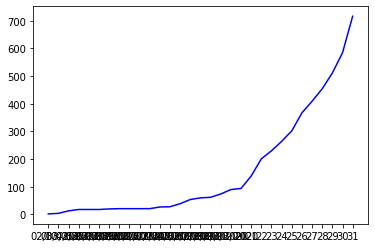

In [4]:
from matplotlib import pyplot

x = data[0]
y = data[2]
pyplot.plot(x,y,'b')

On va transformer les donnés en log pour avoir une forme linéaire et effectuer une regréssion

In [5]:
data["log_cases"] = np.log(data[2])
print(data["log_cases"])

0     0.693147
1     1.386294
2     2.564949
3     2.890372
4     2.890372
5     2.890372
6     2.995732
7     3.044522
8     3.044522
9     3.044522
10    3.044522
11    3.295837
12    3.332205
13    3.663562
14    3.988984
15    4.094345
16    4.127134
17    4.304065
18    4.499810
19    4.543295
20    4.934474
21    5.303305
22    5.438079
23    5.575949
24    5.710427
25    5.905362
26    6.013715
27    6.118097
28    6.236370
29    6.369901
30    6.573680
Name: log_cases, dtype: float64


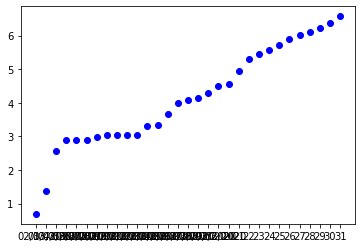

In [6]:
pyplot.plot(x,data["log_cases"],"bo")

On a alors:

\begin{equation*}
        log(N(t)) = log(N_0) + t*log(R)
\end{equation*}

On va utiliser SciPy pour une effectuer une regression linéaire

In [10]:
from scipy import stats
from sklearn.linear_model import LinearRegression

# We put y values as the log of cases and x a number from 0 to 21
x = np.asarray([i for i in range(0,31)])
y = data["log_cases"]
"""
x = x.reshape(-1,1)
print(x)
reg = LinearRegression().fit(x, y)

print("with sklearn:",reg.score(x,y))
print("regression:", reg.coef_,reg.intercept_)
"""
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print("a =",slope)
print("b =", intercept)
print("erreur",std_err)



a = 0.16262062696850493
b = 1.70643004618172
erreur 0.006583433726679422


donc a = log(R) et b = log(N_0), donc ce cas, le taux de base de reproduction (de contamination) R = exp(a), et N_0 = exp(b) :


In [11]:
N0 = np.exp(intercept)
R0 = np.exp(slope)
print("N0",N0)
print("R0",R0)

N0 5.50925853071657
R0 1.1765902384024625


donc le modele exponentielle associé est: 

\begin{equation*}
        N(t) = 6.0483*(1.1608)^t
\end{equation*}
    

le 20/03 121.05221223308317
le 21/03 142.42885125046882
le 23/03 615.4958654811791
le 25/03 724.1864271022305


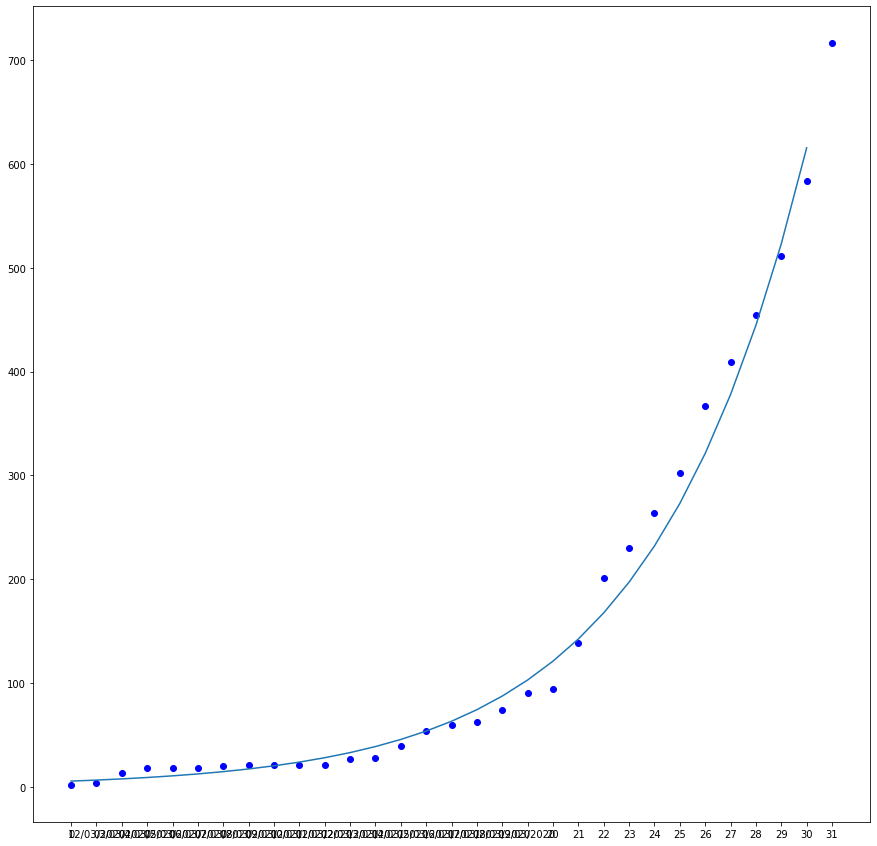

In [16]:
import math
def N(t):
    base = R0
    return N0*math.pow(base,t)

x = [i for i in range(0,30)]

pyplot.figure(figsize=(15,15))

pyplot.plot(data[0],data[2],"bo")
pyplot.plot(x,[N(t) for t in x])


print("le 20/03", N(19))
print("le 21/03", N(20))
print("le 23/03", N(29))
print("le 25/03", N(30))

## Amélioration:

Ce modele n'est pas parfait et donne que des projection théorique si la croissance continue au meme rythme, mais ça reste intéréssant pour imaginer le pire cas possible.

L'erreur est pour l'instant acceptable (R^2) mais les données ne sont pas suffisante, il serait plus intéréssant d'avoir des données horaires, aussi le test n'est pas exhaustive, il existe plusieurs cas non déclarés en ce moment qui peuvent etre déclaré a tout moment et donc faussé le modele. 

Une étude plus correcte serait de suivre un modele logistique (un fonction sigmoid ou tanh) pour prédire la stabilisation.

D'autre modele basé sur des equation différentielle existe comme le model RIS.

>>Par Annis Souames